# 概述

## 聚类概念

“类”指的是具有相似性的集合。聚类是指将数据集划分为若干类，使得类内之间的数据最为相似，各类之间的数据相似度差别尽可能大。聚类分析就是以相似性为基础，对数据集进行聚类划分，属于无监督学习。

## 无监督学习和监督学习

上一篇对KNN进行了验证，和KNN所不同，K-均值聚类属于无监督学习。那么监督学习和无监督学习的区别在哪儿呢？监督学习知道从对象（数据）中学习什么，而无监督学习无需知道所要搜寻的目标，它是根据算法得到数据的共同特征。比如用分类和聚类来说，分类事先就知道所要得到的类别，而聚类则不一样，只是以相似度为基础，将对象分得不同的簇。

## K-means

k-means算法是一种简单的迭代型聚类算法，采用距离作为相似性指标，从而发现给定数据集中的K个类，且每个类的中心是根据类中所有值的均值得到，每个类用聚类中心来描述。对于给定的一个包含n个d维数据点的数据集X以及要分得的类别K,选取欧式距离作为相似度指标，聚类目标是使得各类的聚类平方和最小，即最小化：  
$J = \sum\limits_{k=1}^{k}\sum\limits_{i=1}^{k} ||x_i-u_k||^2$  
结合最小二乘法和拉格朗日原理，聚类中心为对应类别中各数据点的平均值，同时为了使得算法收敛，在迭代过程中，应使最终的聚类中心尽可能的不变。

# 算法流程

K-means是一个反复迭代的过程，算法分为四个步骤：

1. 选取数据空间中的K个对象作为初始中心，每个对象代表一个聚类中心；
2. 对于样本中的数据对象，根据它们与这些聚类中心的欧氏距离，按距离最近的准则将它们分到距离它们最近的聚类中心（最相似）所对应的类；
3. 更新聚类中心：将每个类别中所有对象所对应的均值作为该类别的聚类中心，计算目标函数的值；
4. 判断聚类中心和目标函数的值是否发生改变，若不变，则输出结果，若改变，则返回2）。  
 
用以下例子加以说明：   
![图片1](./图片\k-means\tu1.jpg) 步骤1  
![图片2](./图片\k-means\tu2.jpg) 步骤2  
![图片3](./图片\k-means\tu3.jpg) 步骤3  
![图片4](./图片\k-means\tu4.jpg) 步骤4     

1. 给定一个数据集；
2. 根据K = 5初始化聚类中心，保证　聚类中心处于数据空间内；
3. 根据计算类内对象和聚类中心之间的相似度指标，将数据进行划分；
4. 将类内之间数据的均值作为聚类中心，更新聚类中心。  
最后判断算法结束与否即可，目的是为了保证算法的收敛。

# python实现

## 导包，初始化图形参数，导入样例数据集

In [15]:

%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


# 导入数据集
data = pd.read_csv('./图片/k-means/xclara.csv')
# print(data.shape)
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


## 将数据集转换为二维数组，并绘制二维坐标图

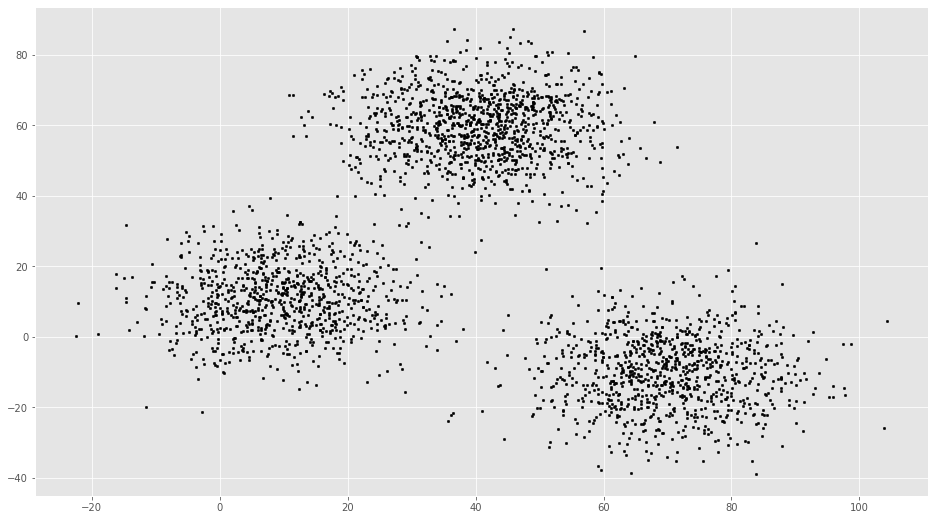

In [16]:

# 将csv文件中的数据转换为二维数组
f1 = data['V1'].values
f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=6)

## 定义距离计算函数

In [23]:
# 按行的方式计算两个坐标点之间的距离
def dist(a, b, ax=1): 
    return np.linalg.norm(a - b, axis=ax)    # np.linalg.norm 是求范数，默认是求L2范数，就是差的平方和再求跟。

## 初始化分区数，随机获得初始中心点

In [24]:
# 设定分区数
k = 3
# 随机获得中心点的X轴坐标
C_x = np.random.randint(0, np.max(X)-20, size=k)
# 随机获得中心点的Y轴坐标
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

## 将初始化中心点和样例数据画到同一个坐标系上

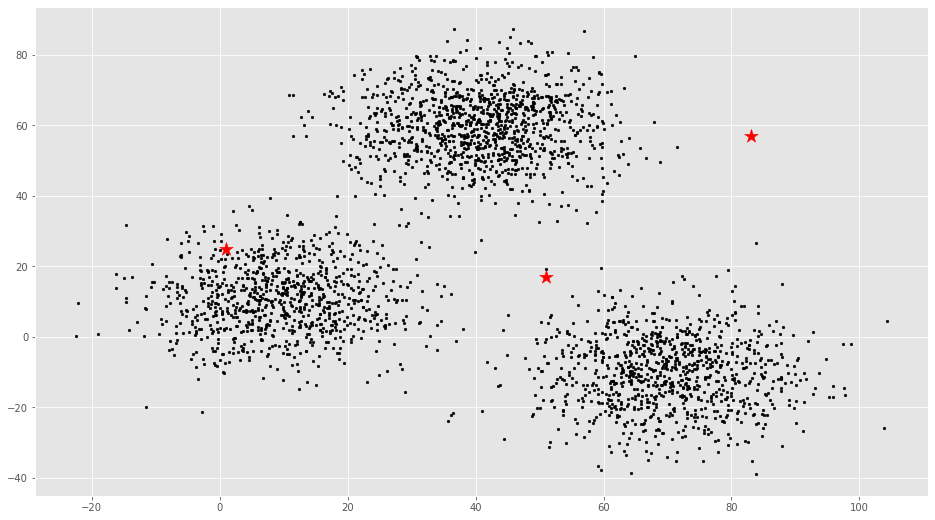

In [19]:
# 将初始化中心点画到输入的样例数据上
plt.scatter(f1, f2, c='black', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='red')

## 实现K-Means中的核心迭代

In [20]:
# 用于保存中心点更新前的坐标
C_old = np.zeros(C.shape)
print(C)
# 用于保存数据所属中心点
clusters = np.zeros(len(X))
# 迭代标识位，通过计算新旧中心点的距离
iteration_flag = dist(C, C_old, 1)

tmp = 1
# 若中心点不再变化或循环次数不超过200次(此限制可取消)，则退出循环
while iteration_flag.any() != 0 and tmp < 200:
    # 循环计算出每个点对应的最近中心点
    for i in range(len(X)):
        # 计算出每个点与中心点的距离
        distances = dist(X[i], C, 1)
        # print(distances)
        # 记录0 - k-1个点中距离近的点
        cluster = np.argmin(distances) 
        # 记录每个样例点与哪个中心点距离最近
        clusters[i] = cluster
        
    # 采用深拷贝将当前的中心点保存下来
    # print("the distinct of clusters: ", set(clusters))
    C_old = deepcopy(C)
    # 从属于中心点放到一个数组中，然后按照列的方向取平均值
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        # print(points)
        # print(np.mean(points, axis=0))
        C[i] = np.mean(points, axis=0)
        # print(C[i])
    # print(C)
    
    # 计算新旧节点的距离
    print ('循环第%d次' % tmp)
    tmp = tmp + 1
    iteration_flag = dist(C, C_old, 1)
    print("新中心点与旧点的距离：", iteration_flag)

[[ 1. 25.]
 [83. 57.]
 [51. 17.]]
循环第1次
新中心点与旧点的距离： [11.242356 37.685066 14.872145]
循环第2次
新中心点与旧点的距离： [ 9.547822  6.890435 17.771013]
循环第3次
新中心点与旧点的距离： [0.8165098 0.5101746 0.573058 ]
循环第4次
新中心点与旧点的距离： [0.03402718 0.02599239 0.        ]
循环第5次
新中心点与旧点的距离： [0. 0. 0.]


In [21]:
## 将最终结果和样例点画到同一个坐标系上

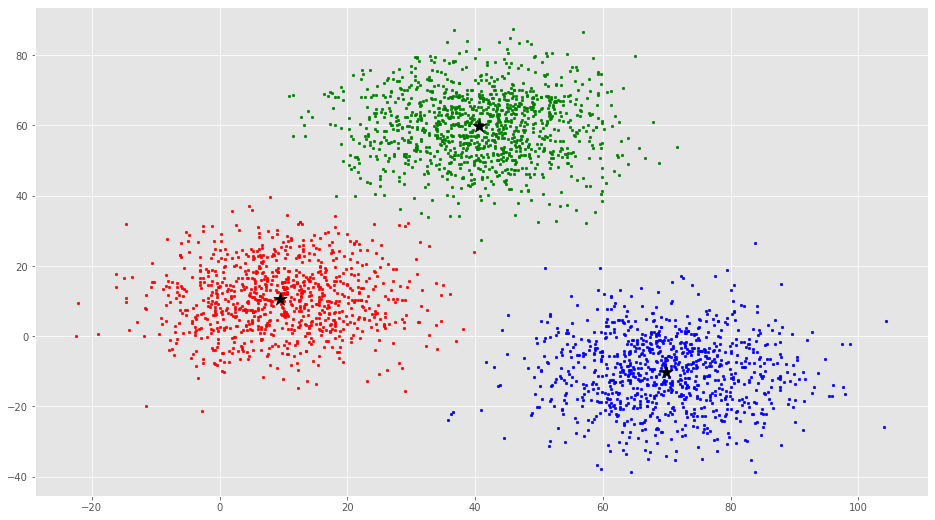

In [22]:

# 最终结果图示
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
# 不同的子集使用不同的颜色
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')